# Sorbas river profiles

*This lesson has been written by Simon M. Mudd at the University of Edinburgh*

*Last update 05/10/2022*

This lesson just shows the $\chi$--elevation profiles in a location in southern Spain. For eroding landscapes students, this just gives you another example landscape to look at. For students doing the physical geography Spain trip, this is the main catchement in which we will do fieldwork. 

Lets now look at these profiles around Sorbas, Spain.

As in the previous example, I have per-prepared the channel data and put it into a `csv` file. 

First we load the data, using `geopandas`

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
df = pd.read_csv("SorbasChi_chi_data_map.csv")
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.crs = "EPSG:4326" 
print(gdf.head())

    latitude  longitude     chi  elevation  flow_distance  drainage_area  \
0  37.013853  -2.258956  22.741     978.83        54836.0       616410.0   
1  37.013852  -2.258844  22.716     977.75        54826.0       624310.0   
2  37.013851  -2.258732  22.692     976.33        54816.0       628310.0   
3  37.013941  -2.258618  22.657     974.47        54802.0       630510.0   
4  37.013940  -2.258506  22.632     974.47        54792.0       631510.0   

   source_key  basin_key                   geometry  
0           0          0  POINT (-2.25896 37.01385)  
1           0          0  POINT (-2.25884 37.01385)  
2           0          0  POINT (-2.25873 37.01385)  
3           0          0  POINT (-2.25862 37.01394)  
4           0          0  POINT (-2.25851 37.01394)  


In [3]:
bounds = gdf.total_bounds
print(bounds)

[-2.28424365 36.9505044  -1.84822818 37.2145823 ]


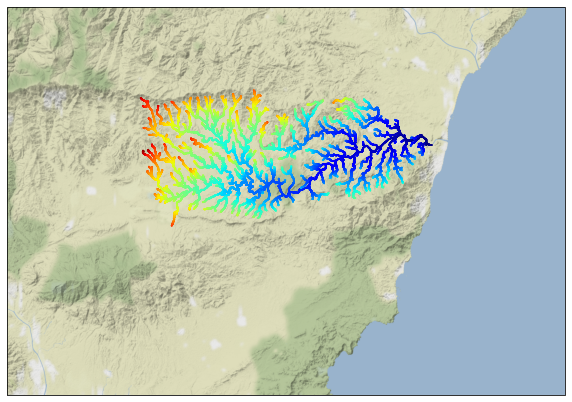

In [4]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
plt.rcParams['figure.figsize'] = [10, 10]

stamen_terrain = cimgt.Stamen('terrain-background')

fig = plt.figure()

# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([bounds[0]-0.2, bounds[2]+0.2, bounds[1]-0.1, bounds[3]+0.1], crs=ccrs.Geodetic())

# Add the Stamen data at zoom level 11.
ax.add_image(stamen_terrain, 11)

# Add the channel data
gdf = gdf.to_crs(epsg=3857)    # We have to convert the data to the same 
                               #system as the ap tiles. It happens to be this one. 
                               # This epsg code is used for all map tiles (like google maps)

# Isolate a basin        
gdf_b1 = gdf[(gdf['basin_key'] == 1)]
gdf_b1.plot(ax=ax, markersize=0.5, column='chi', zorder=10,cmap="jet")

Now let's plot the data in profile

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
plt.rcParams['figure.figsize'] = [10, 10]

# First lets isolate just one of these basins. There is only basin 0 and 1
gdf_b1 = gdf[(gdf['basin_key'] == 0)]

# The main stem channel is the one with the minimum source key in this basin
min_source = np.amin(gdf_b1.source_key)
gdf_b2 = gdf_b1[(gdf_b1['source_key'] == min_source)]
#gdf_b2 = gdf_b1

# Now make channel profile plots
z = gdf_b2.elevation
x_locs = gdf_b2.flow_distance
chi = gdf_b2.chi

# Create two subplots and unpack the output array immediately
plt.clf()
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_locs, z,s = 0.2)
ax2.scatter(chi, z,s = 0.2)


ax1.set_xlabel("Distance from outlet ($m$)")
ax1.set_ylabel("elevation (m)")

ax2.set_xlabel("$\chi$ ($m$)")
ax2.set_ylabel("elevation (m)")

plt.tight_layout()

NameError: name 'plt' is not defined